In [74]:
import numpy as np
import pandas as pd


In [75]:
df = pd.read_csv('FAOSTAT_data_en_3-27-2023.csv')

In [77]:
# pivot so that the columns are the animal type (Item) and the rows are the values (Value)
livestock_counts_pivoted = df.pivot_table(columns='Item', values='Value', aggfunc=np.sum)

# now transpose so that we have the animal type and total population as columns
livestock_counts = livestock_counts_pivoted.transpose()

In [78]:
livestock_counts

,Value
Item,
Asses,55000366
Bees,111007736
Buffalo,230961965
Camels,39757450
Cattle,1589818026
Chickens,30424208
Ducks,1769953
Geese,680195
Goats,1244310660


In [89]:
# filter all animals with less than 50 million
low_pop_livestock = livestock_counts['Value'] < 50*1e6
high_pop_livestock = livestock_counts['Value'] >= 50*1e6


# add an other column for the low population animals
out = pd.concat([
    livestock_counts[high_pop_livestock],
    pd.DataFrame(
        {'Value': livestock_counts[low_pop_livestock]['Value'].sum()},
        index=['Other']
    )
])

In [90]:
out

,Value
Asses,55000366
Bees,111007736
Buffalo,230961965
Cattle,1589818026
Goats,1244310660
Horses,61887544
Sheep,1470600904
Swine / pigs,1430216958
Other,90139334


<AxesSubplot:title={'center':'Livestock Counts'}>

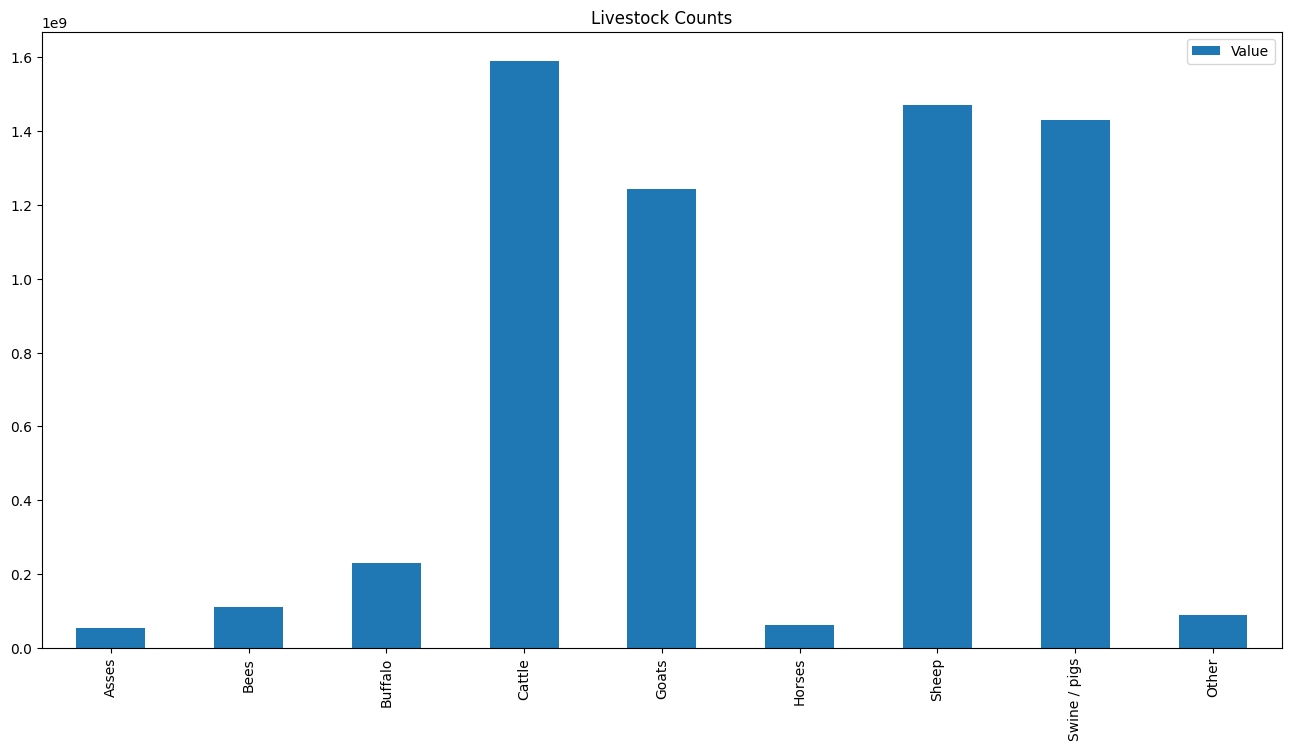

In [93]:
# plot the data with a bar chart
out.plot(kind='bar', figsize=(16,8), title='Livestock Counts')

<AxesSubplot:title={'center':'Livestock Counts'}>

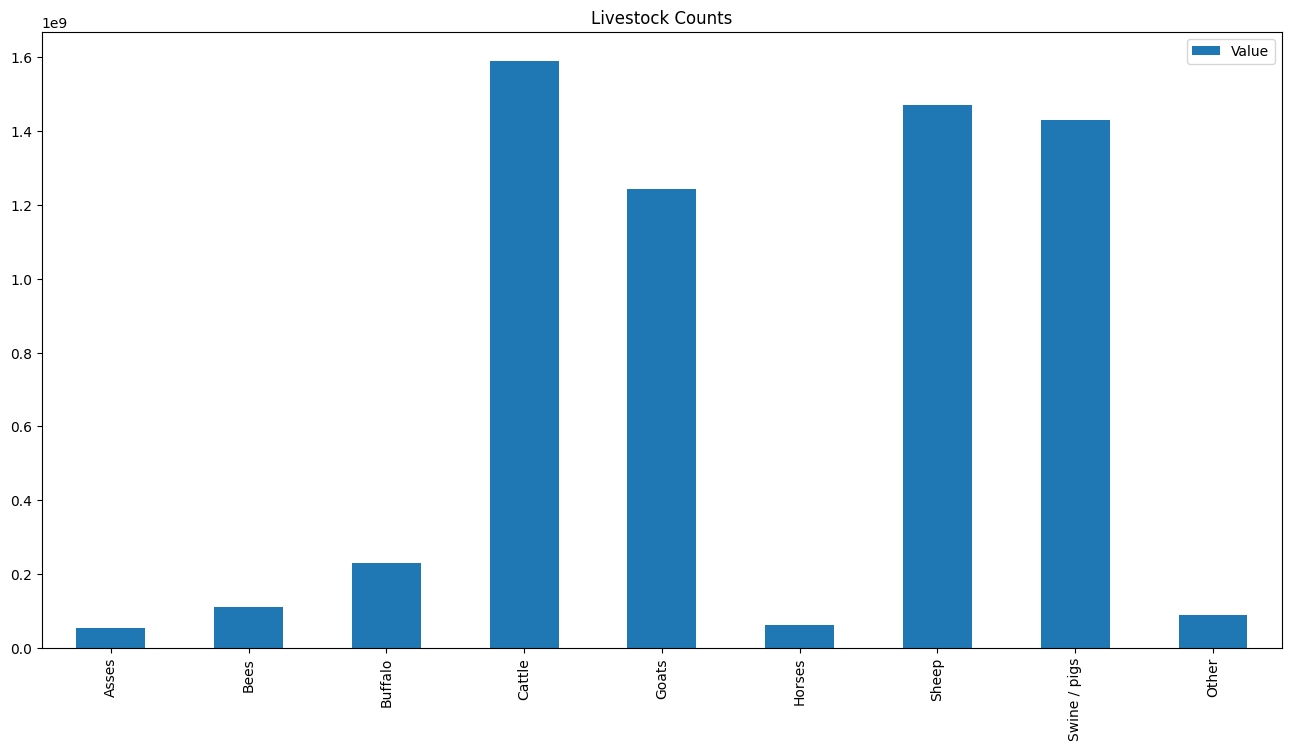

In [94]:
import matplotlib.pyplot as plt

# plot stacked bar plot
out.plot(kind='bar', stacked=True, figsize=(16,8), title='Livestock Counts')